# Imports

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [7]:
DATA_PATH = "../data"
df_train = pd.read_csv(f"{DATA_PATH}/train.csv")
df_test = pd.read_csv(f"{DATA_PATH}/test.csv")

# Statistics

In [8]:
df_train.columns

Index(['Id', 'Location', 'Weekly Cases', 'Year', 'Weekly Cases per Million',
       'Weekly Deaths', 'Weekly Deaths per Million', 'Total Vaccinations',
       'People Vaccinated', 'People Fully Vaccinated', 'Total Boosters',
       'Daily Vaccinations', 'Total Vaccinations per Hundred',
       'People Vaccinated per Hundred', 'People Fully Vaccinated per Hundred',
       'Total Boosters per Hundred', 'Daily Vaccinations per Hundred',
       'Daily People Vaccinated', 'Daily People Vaccinated per Hundred',
       'Next Week's Deaths'],
      dtype='object')

In [9]:
df_train.describe()

,Id,Weekly Cases,Year,Weekly Cases per Million,Weekly Deaths,Weekly Deaths per Million,Total Vaccinations,People Vaccinated,People Fully Vaccinated,Total Boosters,Daily Vaccinations,Total Vaccinations per Hundred,People Vaccinated per Hundred,People Fully Vaccinated per Hundred,Total Boosters per Hundred,Daily Vaccinations per Hundred,Daily People Vaccinated,Daily People Vaccinated per Hundred,Next Week's Deaths
count,1.291560e+05,1.289430e+05,129156.000000,128288.000000,127898.000000,127247.000000,4.027000e+04,3.842900e+04,3.657400e+04,1.984700e+04,7.784000e+04,40270.000000,38429.000000,36574.000000,19847.000000,77840.000000,7.739100e+04,77391.000000,129156.000000
mean,5.502597e+08,9.520131e+04,2020.912919,1379.071563,1072.815494,10.845384,2.450093e+08,1.174096e+08,9.862264e+07,4.365458e+07,4.742138e+05,89.723652,43.424276,38.421866,20.160324,2702.988798,1.823430e+05,0.114669,1064.082776
std,2.599890e+08,6.329716e+05,0.739667,4013.421702,5287.848128,24.740908,1.032824e+09,4.932070e+08,4.303844e+08,1.862997e+08,2.593336e+06,74.209648,30.074617,29.197973,22.598973,3468.942102,1.061855e+06,0.202150,5251.447471
min,1.000006e+08,0.000000e+00,2020.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3.253421e+08,1.040000e+02,2020.000000,18.291500,1.000000,0.050000,9.900038e+05,5.771390e+05,4.683338e+05,3.894150e+04,1.065000e+03,18.730000,12.810000,8.390000,0.295000,402.000000,3.280000e+02,0.012000,1.000000
50%,5.497285e+08,1.084000e+03,2021.000000,188.584000,13.000000,1.709000,7.772026e+06,4.306986e+06,3.811594e+06,1.397130e+06,9.182500e+03,79.195000,46.330000,38.515000,9.780000,1498.000000,3.287000e+03,0.046000,13.000000
75%,7.756598e+08,9.750000e+03,2021.000000,1046.367750,127.000000,10.934000,4.976308e+07,2.557442e+07,2.168825e+07,1.114840e+07,6.394475e+04,146.290000,70.380000,64.720000,36.860000,3840.000000,2.318000e+04,0.141000,125.000000
max,9.999993e+08,2.406618e+07,2022.000000,104220.239000,103568.000000,1040.710000,1.212140e+10,5.255161e+09,4.816606e+09,2.129044e+09,4.368841e+07,366.870000,128.780000,126.790000,125.850000,117862.000000,2.099974e+07,11.786000,102123.000000


There is a high max of Weekly Deaths per Million, Weekly Deaths, Weekly Cases per Million, Daily People Vaccinated and Daily Vaccinations per Hundred. It will be looked into when applying data preprocessing.

# Correlation

/var/folders/sd/rjwvv_616xz49rxkpk2gfxxc0000gn/T/ipykernel_63889/3442449655.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.drop(columns=["Id"]).corr(method="spearman")


<Axes: >

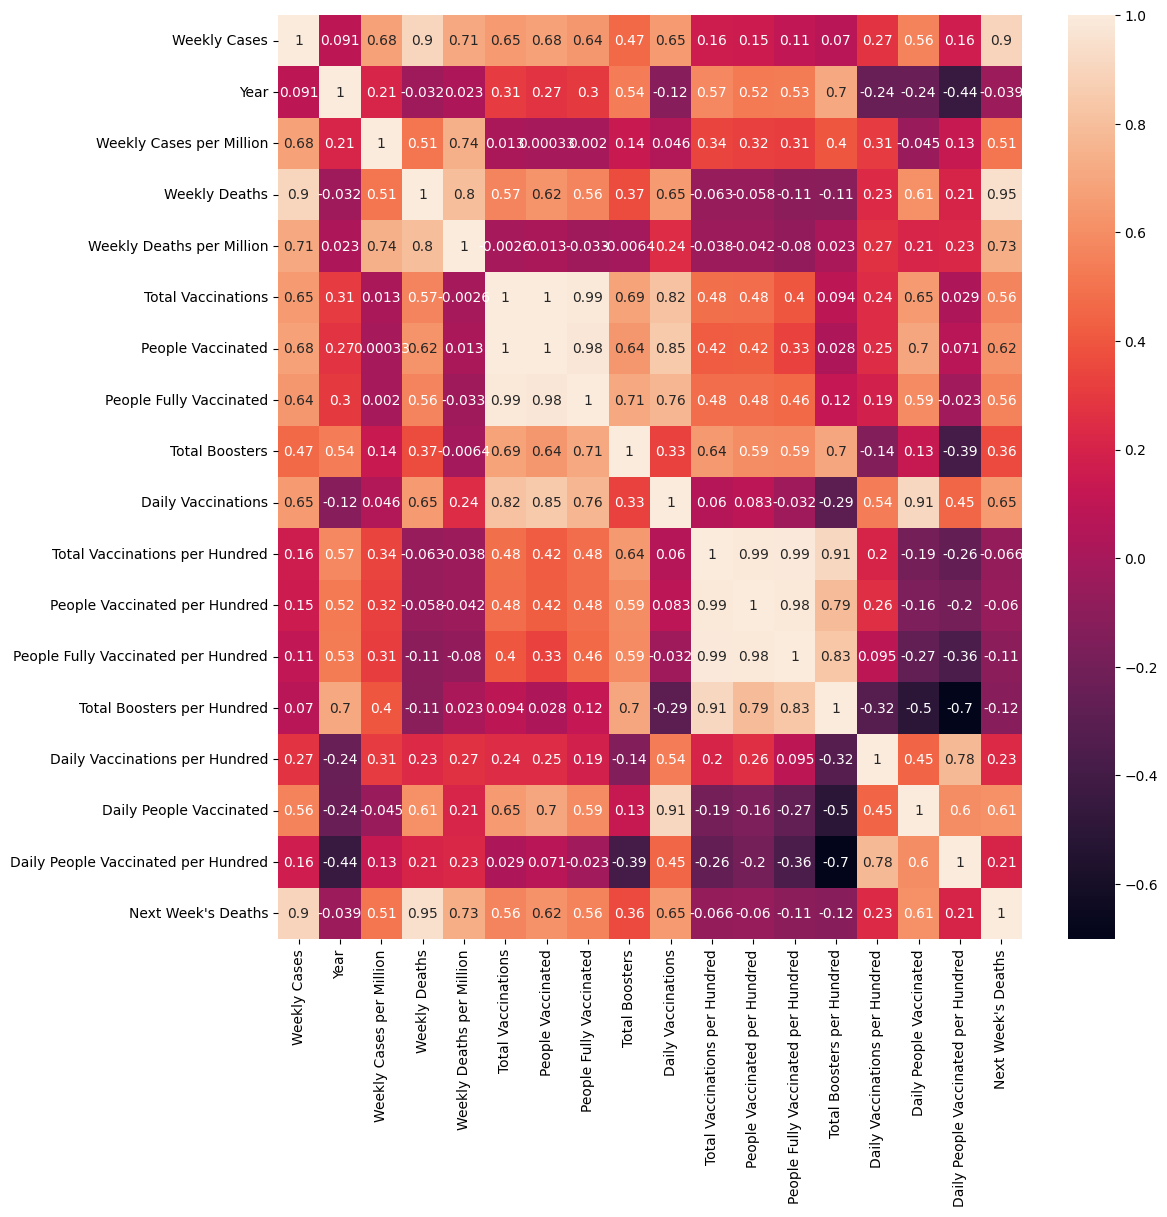

In [17]:
corr = df_train.drop(columns=["Id"]).corr(method="spearman") # No linearity and not continuous so will not use pearson
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True)

# Hypothesys test

Question: Did the rate of deaths by covid decreased in Brazil after the vaccine?      
Null Hypothesys: it increased or remained the same.         
Alternative: ( before_vac - after_vac > 0 )      
p = 5% (0.05)       
Paired test, since the vaccine is the difference.       

In [67]:
before_vac = df_train.loc[(df_train["Location"] == "Brazil") & (df_train["People Vaccinated"].isna())]
after_vac = df_train.loc[(df_train["Location"] == "Brazil") & (df_train["People Vaccinated"].notna())]

In [68]:
before_vac = (before_vac["Weekly Deaths"]/before_vac["Weekly Cases"]).dropna()
after_vac = (after_vac["Weekly Deaths"]/after_vac["Weekly Cases"]).dropna()

In [69]:
len(before_vac), len(after_vac)

(245, 368)

In [70]:
after_vac = after_vac.sample(len(before_vac))

In [71]:
len(before_vac), len(after_vac)

(245, 245)

In [72]:
# Shapiro-Wilk test null hypothesis is that the data was drawn from a normal distribution
stats.shapiro(before_vac), stats.shapiro(after_vac)

(ShapiroResult(statistic=0.8411974310874939, pvalue=3.946542918175809e-15),
 ShapiroResult(statistic=0.921519935131073, pvalue=4.3641945612904465e-10))

The null has very low probability so it is not a normal distribution. In that case, we will use a non-parametric test.

By looking at the table, the test to be used is the **Wilcoxon Test**.

In [73]:
stats.wilcoxon(before_vac, after_vac, alternative="greater")

WilcoxonResult(statistic=20540.0, pvalue=4.146707853063673e-07)

The p value has probability of 0.000041267%, so the null hypothesys failed, **which means that the vaccine was an essencial factor for stopping covid in Brazil.**

## Checking the hypothesis for different locations

In [76]:
not_countries = ["High income", "Low income", "Lower middle income", "Upper middle income"]

In [98]:
location_counts = list(df_train.loc[~df_train["Location"].isin(not_countries)]["Location"].dropna().astype(str).value_counts().to_dict().items())
locations = [it[0] for it in location_counts if it[1] > 500]

In [99]:
accepted = []
rejected = []
for loc in locations:
    before_vac = df_train.loc[(df_train["Location"] == loc) & (df_train["People Vaccinated"].isna())]
    after_vac = df_train.loc[(df_train["Location"] == loc) & (df_train["People Vaccinated"].notna())]

    before_vac = (before_vac["Weekly Deaths"]/before_vac["Weekly Cases"]).dropna()
    after_vac = (after_vac["Weekly Deaths"]/after_vac["Weekly Cases"]).dropna()


    if len(before_vac) > len(after_vac):
        before_vac = before_vac.sample(len(after_vac))
    else:
        after_vac = after_vac.sample(len(before_vac))

    if len(before_vac) < 200 or len(after_vac) < 200:
        continue

    print(f"{loc:^70}")
    print("-"*70)
    print(f"{'':10} {'Before':^25} | {'After':^25}")
    print(f"Length  {len(before_vac):^28} | {len(after_vac):^28}")

    p_b = stats.shapiro(before_vac).pvalue
    p_a = stats.shapiro(after_vac).pvalue

    print(f"pNormal {p_b:^28} | {p_a:^28}")

    if p_b >= 0.05 or p_a >= 0.05:
        continue

    p = stats.wilcoxon(before_vac, after_vac, alternative="greater").pvalue
    print(f"pValue {p:^56}")
    print(f"Conclusion: {'Reject' if p < 0.05 else 'Accept':^53}")
    print()
    if p > 0.05:
        accepted.append(loc)
    else:
        rejected.append(loc)


                            North America                             
----------------------------------------------------------------------
                    Before           |           After          
Length              261              |             261             
pNormal    5.749893833631448e-13     |    5.410745870904066e-06    
pValue                  1.0918604874951967e-11                 
Conclusion:                        Reject                        

                            European Union                            
----------------------------------------------------------------------
                    Before           |           After          
Length              235              |             235             
pNormal    1.5202802565158943e-26    |    1.2992746798150961e-14   
pValue                  4.2009522058415637e-22                 
Conclusion:                        Reject                        

                                 Asia               

In [100]:
len(accepted), len(rejected)

(24, 47)